In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_DeepLearning/LDS8_DinhVietHa_thi/'

/content/gdrive/My Drive/LDS8_DeepLearning/LDS8_DinhVietHa_thi


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
dataset = pd.read_csv("./AAPL_Nov14.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
1,2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2,2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
3,2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
4,2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1008 non-null   object 
 1   Open       1008 non-null   float64
 2   High       1008 non-null   float64
 3   Low        1008 non-null   float64
 4   Close      1008 non-null   float64
 5   Adj Close  1008 non-null   float64
 6   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
np.random.seed(7)

## Open to Open ( One to One )

In [ ]:
data_open = dataset[['Open']].values

In [ ]:
data_open = data_open.astype('float32')
data_open[:10]

array([[26.9275],
       [26.6425],
       [26.675 ],
       [27.4525],
       [27.43  ],
       [27.53  ],
       [27.9875],
       [27.84  ],
       [27.7825],
       [27.8575]], dtype=float32)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data_open = scaler.fit_transform(data_open)

In [ ]:
train_size = int(len(data_open)*0.67)
test_size = len(data_open) - train_size
train, test = data_open[0: train_size, :], data_open[train_size:len(data_open),]

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(673, 1)

In [ ]:
trainY.shape

(673,)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early = EarlyStopping(patience=10)

checkpoint = ModelCheckpoint('Q5_AAPL_checkpoint_new.h5', save_best_only=True)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1
          #, callbacks=[early, checkpoint])
)

Epoch 1/100
673/673 [==============================] - 1s 1ms/step - loss: 0.0030
Epoch 2/100
673/673 [==============================] - 1s 1ms/step - loss: 6.0453e-04
Epoch 3/100
673/673 [==============================] - 1s 1ms/step - loss: 5.0928e-05
Epoch 4/100
673/673 [==============================] - 1s 1ms/step - loss: 4.0242e-05
Epoch 5/100
673/673 [==============================] - 1s 1ms/step - loss: 4.1647e-05
Epoch 6/100
673/673 [==============================] - 1s 1ms/step - loss: 4.0560e-05
Epoch 7/100
673/673 [==============================] - 1s 1ms/step - loss: 4.2319e-05
Epoch 8/100
673/673 [==============================] - 1s 1ms/step - loss: 4.0876e-05
Epoch 9/100
673/673 [==============================] - 1s 1ms/step - loss: 4.4920e-05
Epoch 10/100
673/673 [==============================] - 1s 1ms/step - loss: 4.3430e-05
Epoch 11/100
673/673 [==============================] - 1s 1ms/step - loss: 4.4170e-05
Epoch 12/100
673/673 [==============================] - 

Predictions

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.66 RMSE
Test Score: 7.85 RMSE


In [ ]:
trainPredictPlot = np.empty_like(data_open)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(data_open)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2) + 1:len(data_open)-1, :] = testPredict 

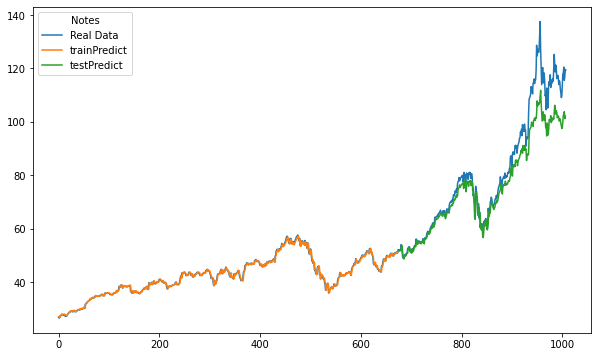

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(data_open), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title='Notes')
plt.show()

The train predict is similar to real data, while test predict is slightly lower than the real data in the end.
--> the model predicts well for Open.